In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import openpathsampling as paths
storage = paths.storage.Storage("mistis.nc", "r")

In [2]:
mistis = storage.networks.load(0)

In [3]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)


True <openpathsampling.ensemble.TISEnsemble object at 0x10ee94510>
True <openpathsampling.ensemble.TISEnsemble object at 0x10ee9cb10>
True <openpathsampling.ensemble.TISEnsemble object at 0x10ee94d50>


In [4]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [5]:
movers = paths.MoveScheme(mistis)
movers.move_summary(storage)

repex ran 15.0994270307% of the cycles with acceptance 450/1344 (0.334821428571) 
msouter_shooting ran 4.72980563982% of the cycles with acceptance 271/421 (0.643705463183) 
msouter_repex ran 4.8309178744% of the cycles with acceptance 108/430 (0.251162790698) 
pathreversal ran 22.7277833951% of the cycles with acceptance 1321/2023 (0.652990608008) 
shooting ran 48.601280755% of the cycles with acceptance 3027/4326 (0.69972260749) 
minus ran 2.02224469161% of the cycles with acceptance 113/180 (0.627777777778) 
msouter_pathreversal ran 1.97730592068% of the cycles with acceptance 176/176 (1.0) 


In [6]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [7]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})"
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",NaN,0.03313047,0.02244057
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",0.02994397,NaN,NaN


In [8]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

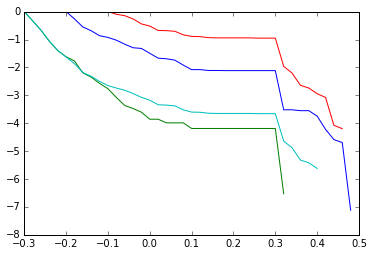

In [9]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x - 0.02, np.log(trans.tcp)) # TODO: seems to be a problem shifting WHAM by one